## HW 2 ( 30 points)

Submit your homework as a. ipynb file. Use the format 'HW2_LastName_FirstName.ipynb'. If there are no comments/markdown describing what you have done, your work will not be graded. Follow the code of conduct.

#### Problem 1: Classes to model a CSTR (10 points)

Create a class named CSTR that takes in inlet concentration, flow rate and reactor volume and calculates residence time as well outlet concentration. The formula for the outlet concentration of a species in a CSTR (Continuous Stirred Tank Reactor) at steady state is: C_out = C_in / (1 + (k * τ)) where C_out is the outlet concentration, C_in is the inlet concentration, k is the reaction rate constant, and τ is the residence time (V/F, with V being the reactor volume and F the volumetric flow rate). Use a reaction rate constant of 2.5 and make sure your class is printing the outputs (both residence time and outlet concentration)

#### Enisha's solution:

In [51]:
#C_out is the outlet concentration
#C_in is the inlet concentration
#k is the reaction rate constant
#τ is the residence time
#(V/F, with V being the reactor volume
#F the volumetric flow rate).

class CSTR: #defining the class name. When you want to run something, you need to create an object by calling the class, like: object1=CSTR(arg1,arg2,arg3)

    def __init__(self, C_in, F, V): #this function contructs the object with the parameters you input
        self.C_in = C_in #this parameter C_in is stored in self.C_in in an object you create
        self.F = F #this parameter F is stored in self.F in an object you create
        self.V = V #this parameter V is stored in self.V in an object you create

    def calc_resi_time_and_outlet_conc(self): #the function that will do the calculation for outlet concentration and residence time
        k = 2.5 #setting the reaction rate constant as 2.5
        C_out = self.C_in / (1 + (k * (self.V/self.F))) #the formula given in the instructions
        tau = (self.V/self.F) #the formula given in the instructions
        print(f'The outlet concentraion is {C_out:.3f} and the residence time is {tau}.') #using an f string to format the output

In [52]:
#creating an object for the class with the object's respective inputs
example1 = CSTR(1,2,3)
example2 = CSTR(4,5,6)
example3 = CSTR(7,8,9)

In [53]:
#executing the object in the class
example1.calc_resi_time_and_outlet_conc()
example2.calc_resi_time_and_outlet_conc()
example3.calc_resi_time_and_outlet_conc()

The outlet concentraion is 0.211 and the residence time is 1.5.
The outlet concentraion is 1.000 and the residence time is 1.2.
The outlet concentraion is 1.836 and the residence time is 1.125.


#### Problem 2: Industrial Reactor Performance Analysis and Statistical Investigation (20 points)

You are provided with a dataset. The dataset contains 12,000 hourly measurements from an industrial batch reactor system producing a specialty chemical. The data includes:

*   Reactor temperature (°C)
*   Pressure (bar)
*   Feed flow rate (L/hr)
*   Product concentration (mol/L)
*   Catalyst activity index
*   Impurity levels (ppm)
*   Conversion efficiency (%)
*   Energy consumption (kW)

Missing values are marked as -999. 

A) Handle missing values (if any). You can choose an appropriate method (e.g., imputation, removal) and justify your choice.

B) Create a 2x4 subplot showing the distributions of all 8 variables. Label each histogram with its mean and standard deviation.

C) Create boxplots for each variable to identify potential outliers.

D) Take Conversion Efficiency:
- Take a large number of random samples (e.g., 1000 or more) of a fixed sample size n (experiment with different sample sizes like 5, 10, 30, 50, 100). For each sample, calculate the sample mean.
- Create a histogram of the calculated sample means. Calculate and report the mean and standard deviation of the distribution of sample means.
- Overlay a normal distribution curve (with the mean and standard deviation calculated in Task B) on each histogram of sample means. Discuss your results in the context of the Central limit Theorem.

## Enisha's solution to part A:
- Handle missing values (if any). You can choose an appropriate method (e.g., imputation, removal) and justify your choice.
#### Justification: Using NaN to replace -999 will not create false data (like replacing it with 0) and it will not impact other values associated with the same index, nor delete the whole row.

In [46]:
#load the csv file and have it as a dataframe (df)
import pandas as pd #importing the library pandas that will handle dataframes
import numpy as np #importing the library numpy that will handle numerical transformations 

df = pd.read_csv('reactor_data.csv') #using the method .read_csv from the pandas library to turn a csv into a data frame
df #printing the df

,Temperature,Pressure,Feed_Flow_Rate,Product_Concentration,Catalyst_Activity,Impurity_Levels,Conversion_Efficiency,Energy_Consumption
0,175.993428,25.784995,146.643132,3.546780,0.912151,50.888158,85.400938,98.362872
1,177.311662,-999.000000,152.901479,3.590290,0.885930,56.555764,85.914539,99.339948
2,140.000000,27.094080,169.627030,3.727576,0.895625,59.850453,84.837386,116.552740
3,-999.000000,28.415711,176.999738,3.787628,0.897124,55.737315,84.493000,115.576534
4,183.191947,28.377296,167.006223,3.800246,0.901719,61.822381,85.409201,112.528946
...,...,...,...,...,...,...,...,...
11995,167.852994,22.220016,130.355357,3.015404,0.683935,33.106905,83.568552,78.637969
11996,171.068741,22.814998,135.811915,2.978584,0.676498,29.543400,83.241091,83.754265
11997,174.479600,23.585640,143.858296,3.133812,0.701806,45.489709,82.963319,40.000000
11998,174.673248,24.036379,151.595853,3.203495,0.655854,5.000000,83.487549,92.982923


In [47]:
#handeling missing values
df.replace(-999, np.nan, inplace = True) #replacing everything that is -999 with NaN (using the np library) and modifying the original df directly

null_count = df.isnull().sum() #looking for NaN in all columns
print(f"Number of null values in column: \n{null_count}") #seeing how many NaN values there are in each column 

Number of null values in column: 
Temperature              105
Pressure                 127
Feed_Flow_Rate           117
Product_Concentration    137
Catalyst_Activity        132
Impurity_Levels          125
Conversion_Efficiency    116
Energy_Consumption       101
dtype: int64


In [48]:
df.head() #now the  df has "NaN" where it orginially had "-999"

,Temperature,Pressure,Feed_Flow_Rate,Product_Concentration,Catalyst_Activity,Impurity_Levels,Conversion_Efficiency,Energy_Consumption
0,175.993428,25.784995,146.643132,3.546780,0.912151,50.888158,85.400938,98.362872
1,177.311662,NaN,152.901479,3.590290,0.885930,56.555764,85.914539,99.339948
2,140.000000,27.094080,169.627030,3.727576,0.895625,59.850453,84.837386,116.552740
3,NaN,28.415711,176.999738,3.787628,0.897124,55.737315,84.493000,115.576534
4,183.191947,28.377296,167.006223,3.800246,0.901719,61.822381,85.409201,112.528946


## Enisha's solution to part B:
- Create a 2x4 subplot showing the distributions of all 8 variables. Label each histogram with its mean and standard deviation.

#### practicing getting the plots right. BUT its very repetitive. 


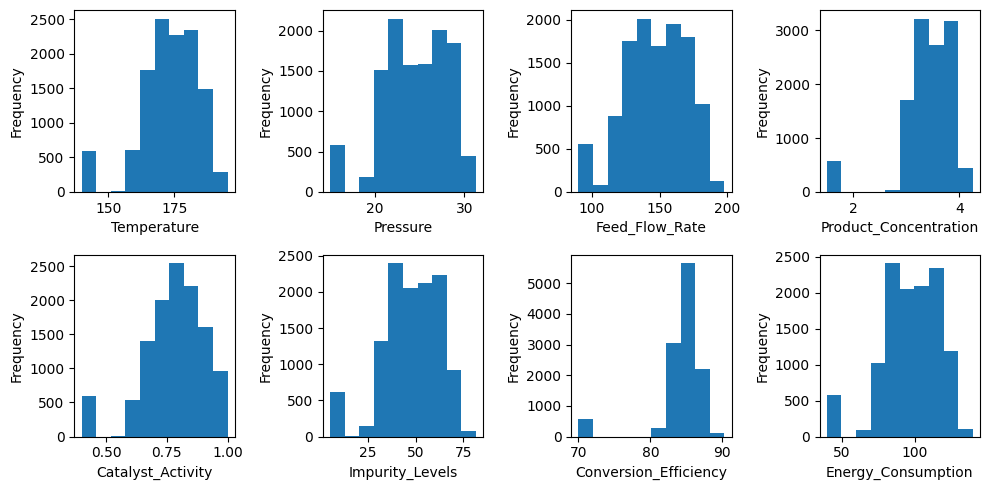

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize=(10,5)) #2 rows, 4 columns (8 plots total)

#1st plot (Temperature)
axes[0,0].hist(df['Temperature'], label='Temperature') #1st plot is in position [0,0] (1st row, 1st column)
axes[0,0].set_xlabel('Temperature', fontsize = 10)
axes[0,0].set_ylabel('Frequency', fontsize = 10)

#2nd plot (Pressure)
axes[0,1].hist(df['Pressure'], label='Pressure') #2nd plot is in position [0,1] (1st row, 2nd column)
axes[0,1].set_xlabel('Pressure', fontsize = 10)
axes[0,1].set_ylabel('Frequency', fontsize = 10)

#3rd plot (Feed_Flow_Rate)
axes[0,2].hist(df['Feed_Flow_Rate'], label='Feed_Flow_Rate') #3rd plot is in position [0,2] (1st row, 3rd column)
axes[0,2].set_xlabel('Feed_Flow_Rate', fontsize = 10)
axes[0,2].set_ylabel('Frequency', fontsize = 10)

#4th plot (Product_Concentration)
axes[0,3].hist(df['Product_Concentration'], label='Product_Concentration') #4th plot is in position [0,3] (1st row, 4th column)
axes[0,3].set_xlabel('Product_Concentration', fontsize = 10)
axes[0,3].set_ylabel('Frequency', fontsize = 10)

#5th plot (Catalyst_Activity)
axes[1,0].hist(df['Catalyst_Activity'], label='Catalyst_Activity') #5th plot is in position [1,0] (2nd row, 1st column)
axes[1,0].set_xlabel('Catalyst_Activity', fontsize = 10)
axes[1,0].set_ylabel('Frequency', fontsize = 10)

#6th plot (Impurity_Levels)
axes[1,1].hist(df['Impurity_Levels'], label='Impurity_Levels') #6th plot is in position [1,1] (2nd row, 2nd column)
axes[1,1].set_xlabel('Impurity_Levels', fontsize = 10)
axes[1,1].set_ylabel('Frequency', fontsize = 10)

#7th plot (Conversion_Efficiency)
axes[1,2].hist(df['Conversion_Efficiency'], label='Conversion_Efficiency') #7th plot is in position [1,2] (2nd row, 3nd column)
axes[1,2].set_xlabel('Conversion_Efficiency', fontsize = 10)
axes[1,2].set_ylabel('Frequency', fontsize = 10)

#8th plot (Energy_Consumption)
axes[1,3].hist(df['Energy_Consumption'], label='Energy_Consumption') #8th plot is in position [1,3] (2nd row, 4nd column)
axes[1,3].set_xlabel('Energy_Consumption', fontsize = 10)
axes[1,3].set_ylabel('Frequency', fontsize = 10)

plt.tight_layout() #prevent overlapping labels

#### Final Answer:

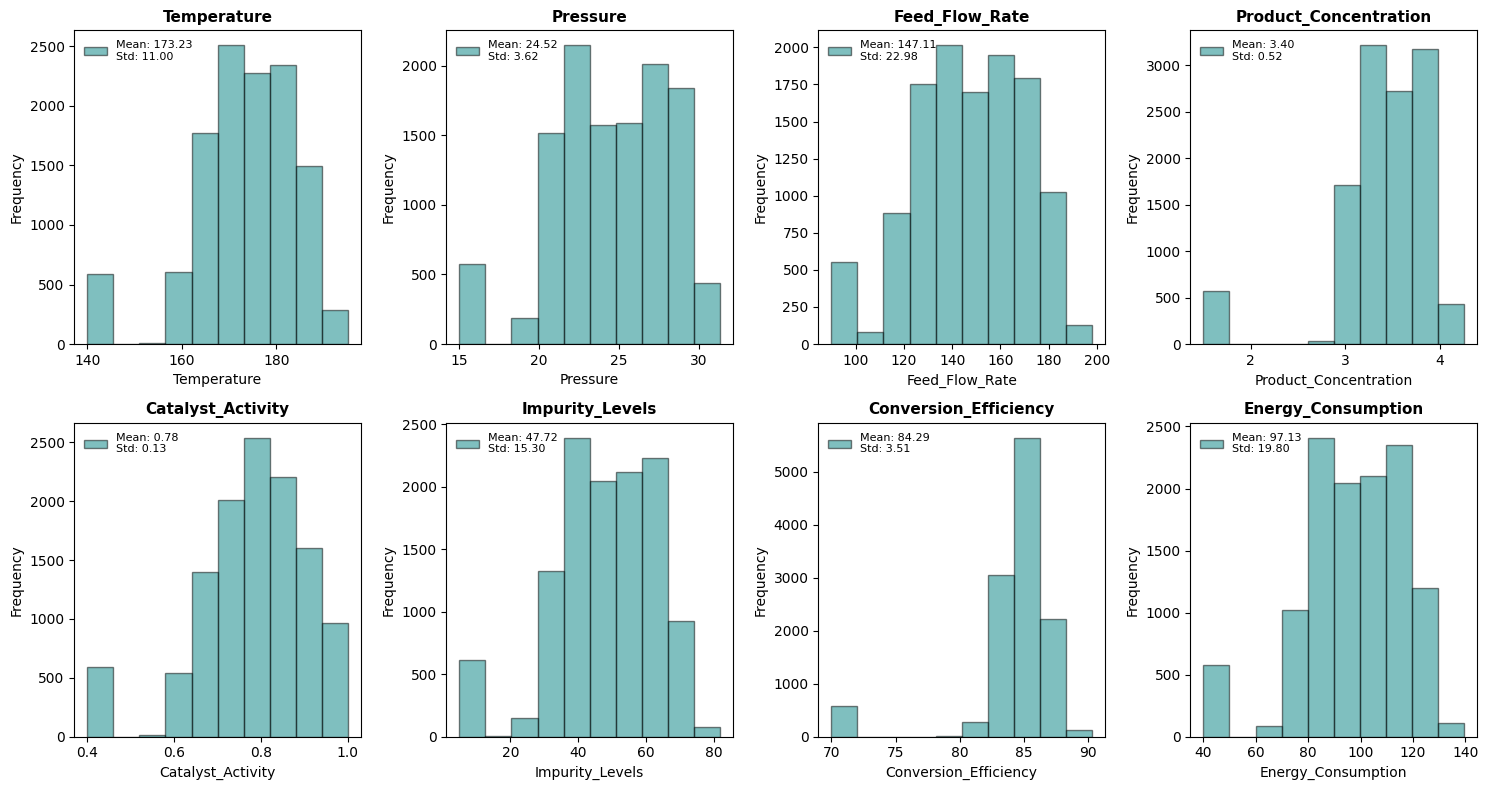

In [31]:
#Doing it using a for loop so the code is not so repetitive!

#list of column names from the df that I want this block of code to iterate through and plot 
columns = [
    'Temperature', 
    'Pressure', 
    'Feed_Flow_Rate', 
    'Product_Concentration', 
    'Catalyst_Activity', 
    'Impurity_Levels', 
    'Conversion_Efficiency', 
    'Energy_Consumption'
]

#creating the subplots 
fig, axes = plt.subplots(2, 4, figsize=(15, 8)) #2 rows, 4 columns (8 plots total), this is a 2D array now
axes = axes.flatten() #flatteing into a 1D array so I can avoid nested loops like:
#for row in range(0,2):
    #for col in range(0,4):
        #ax = axes[row,col]

#using a for loop to loop through columns and their corresponding axes
for i, ax in enumerate(axes): #enumerate() adds an index to each element of the axes. So subplot #1, axes[0] is now index 0. So it can match the index of the columns list to its corresponding subplot
    col = columns[i] #the individual column from the columns list index value stored in "col"
    #calculate mean and standard deviation and store them in variables 
    mean = df[col].mean()
    std = df[col].std()

    #plotting the histogram
    ax.hist(df[col], color='teal', edgecolor='black', alpha=0.5) #teal is my fav color, and I want each bar to have a blackline around it, and be slightly transparent
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(col, fontsize=11, fontweight='bold')
    
    #adding the mean and std as text on the plot as a legend
    ax.legend([f'Mean: {mean:.2f}\nStd: {std:.2f}'], loc='upper left', fontsize=8, frameon=False)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Enisha's solution to part C:
- Create boxplots for each variable to identify potential outliers.

In [61]:
#so through some research I realized boxplot will be blank if there are ANY NaN values 
#SO, I am going to clean the data again! This time I will just replace NaN with the mean of the column values
df_clean = df[columns].fillna(df[columns].mean()) #replacing NaN with the mean of the column values

In [67]:
df_clean.head()

,Temperature,Pressure,Feed_Flow_Rate,Product_Concentration,Catalyst_Activity,Impurity_Levels,Conversion_Efficiency,Energy_Consumption
0,175.993428,25.784995,146.643132,3.546780,0.912151,50.888158,85.400938,98.362872
1,177.311662,24.521927,152.901479,3.590290,0.885930,56.555764,85.914539,99.339948
2,140.000000,27.094080,169.627030,3.727576,0.895625,59.850453,84.837386,116.552740
3,173.226166,28.415711,176.999738,3.787628,0.897124,55.737315,84.493000,115.576534
4,183.191947,28.377296,167.006223,3.800246,0.901719,61.822381,85.409201,112.528946


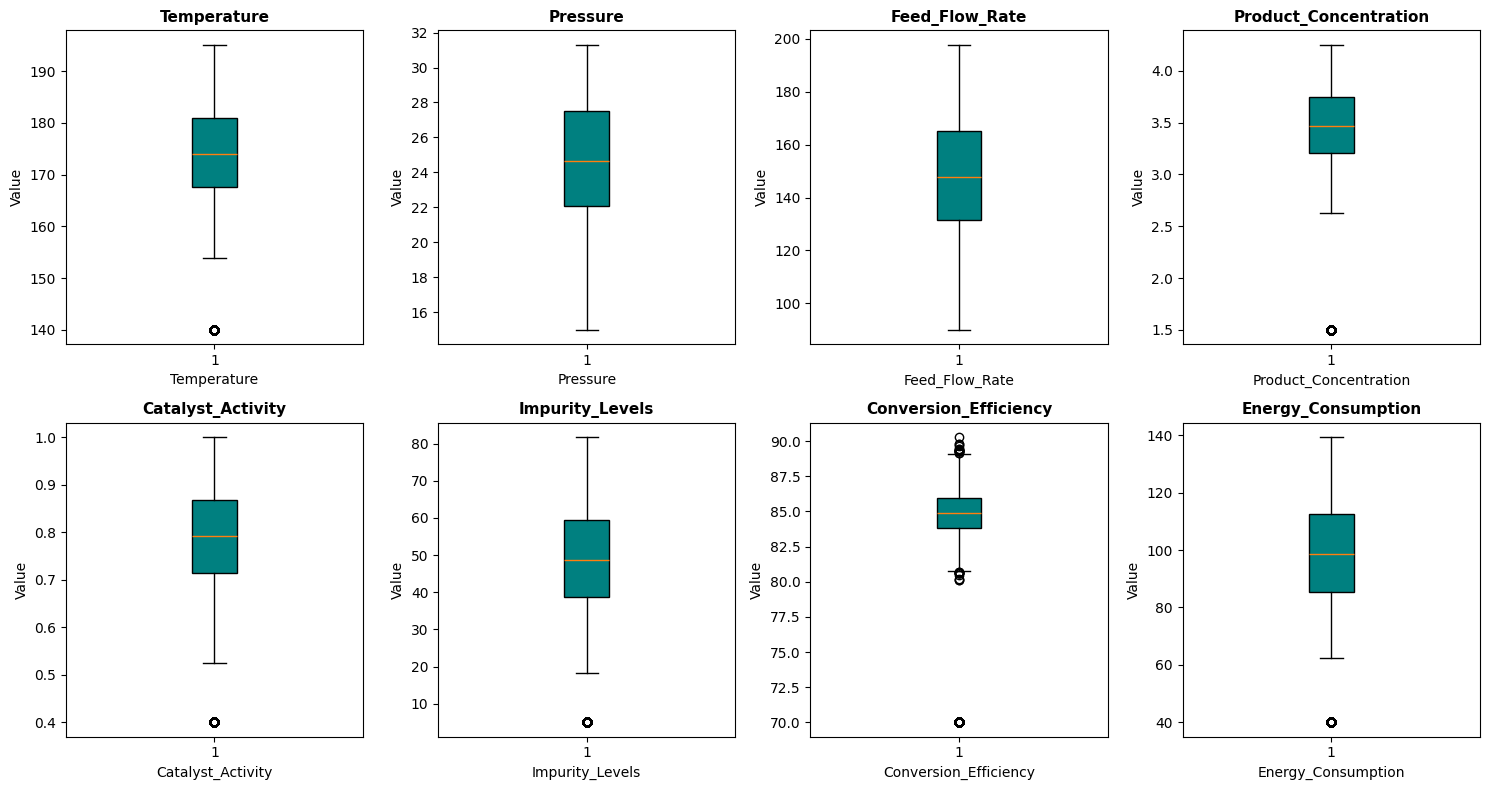

In [66]:
#Using the same chunck of code from the hist plots

#list of column names from the df that I want this block of code to iterate through and plot 
columns = [
    'Temperature', 
    'Pressure', 
    'Feed_Flow_Rate', 
    'Product_Concentration', 
    'Catalyst_Activity', 
    'Impurity_Levels', 
    'Conversion_Efficiency', 
    'Energy_Consumption'
]

#creating the subplots 
fig, axes = plt.subplots(2, 4, figsize=(15, 8)) #2 rows, 4 columns (8 plots total), this is a 2D array now
axes = axes.flatten() #flatteing into a 1D array so I can avoid nested loops like:
#for row in range(0,2):
    #for col in range(0,4):
        #ax = axes[row,col]

#using a for loop to loop through columns and their corresponding axes
for i, ax in enumerate(axes): #enumerate() adds an index to each element of the axes. So subplot #1, axes[0] is now index 0. So it can match the index of the columns list to its corresponding subplot
    col = columns[i] #the individual column from the columns list index value stored in "col"

    #plotting the boxplots 
    ax.boxplot(df_clean[col], patch_artist=True, boxprops=dict(facecolor='teal', color='black')) #filling in the boxplot with the color teal and outlining in black
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.set_title(col, fontsize=11, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Enisha's solution to part D:
- Take Conversion Efficiency:

Take a large number of random samples (e.g., 1000 or more) of a fixed sample size n (experiment with different sample sizes like 5, 10, 30, 50, 100). For each sample, calculate the sample mean.
Create a histogram of the calculated sample means. Calculate and report the mean and standard deviation of the distribution of sample means.
Overlay a normal distribution curve (with the mean and standard deviation calculated in Task B) on each histogram of sample means. Discuss your results in the context of the Central limit Theorem.


In [51]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

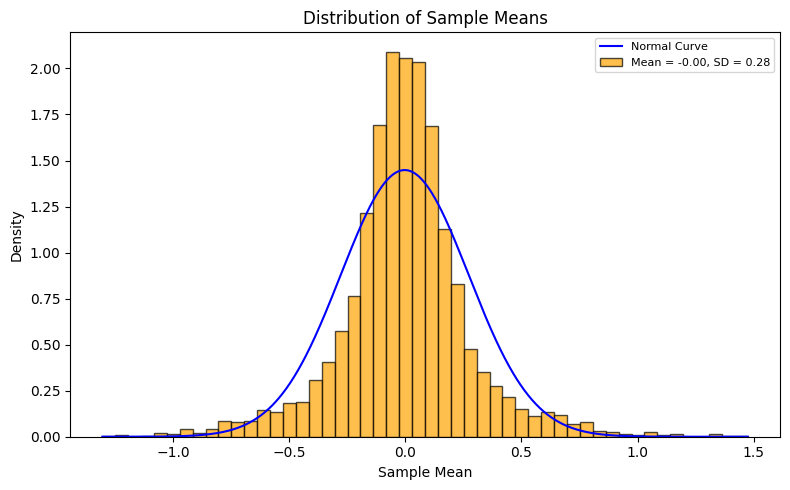

In [57]:
distr = scipy.stats.norm()  #generate samples from a normal distribution and place in variable "distr"

sample_sizes = [5, 10, 30, 50, 100] #define fixed sample sizes
means = [] #initiate a list to contain sample means 


for n in sample_sizes: #for each sample size in the list
    for _ in range(1000): #take 1000 random samples of size n
        sample = distr.rvs(size=n)  #give you n random sample variables, and "rvs" means random variates
        samp_mean = sample.mean() #calc the mean 
        means.append(samp_mean) #append the mean to the list

#calculate mean and standard deviation of sample means generated above
final_mean = np.mean(means)
final_std = np.std(means)

#plot histogram of sample means
fig, ax = plt.subplots(figsize=(8, 5)) #setting up the plot, 1 plot with more than 1 data plot on it 
ax.hist(means, bins=50, color='orange', edgecolor='black', alpha=0.7, density=True)
x = np.linspace(min(means), max(means), 1000) #setting the limits of the graph 

#overlay the normal distribution curve
normal_curve = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std) #calc the normal curve
ax.plot(x, normal_curve, color='blue', label='Normal Curve') #plotting the curve 

#add labels and legend
ax.legend(['Normal Curve', f'Mean = {final_mean:.2f}, SD = {final_std:.2f}'], loc='upper right', fontsize=8)
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample Means')

plt.tight_layout()
plt.show()

### Discusion on CLT:
- The histogram of sample means will approximate a normal distribution regardless of the shape of the original data distribution, provided the sample size is sufficiently large.
- The overlayed normal curve confirms the CLT: the mean of the sample means approaches the true population mean, and the standard deviation of the sample means decreases with larger sample sizes.